In [2]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [532]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/MM.csv")

In [533]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,M&M,EQ,419.75,453.30,453.35,448.90,453.35,453.35,453.18,67195,3.045174e+12,NaN,NaN,NaN
1,2000-01-04,M&M,EQ,453.35,489.60,489.65,489.60,489.65,489.65,489.65,37470,1.834710e+12,NaN,NaN,NaN
2,2000-01-05,M&M,EQ,489.65,528.85,528.85,451.15,519.00,514.85,521.37,227621,1.186745e+13,NaN,NaN,NaN
3,2000-01-06,M&M,EQ,514.85,528.00,550.00,518.00,521.00,524.55,538.27,198870,1.070456e+13,NaN,NaN,NaN
4,2000-01-07,M&M,EQ,524.55,515.00,522.00,490.00,498.90,496.40,508.09,91052,4.626258e+12,NaN,NaN,NaN


In [534]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [535]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.797000e+03,4797.000000
mean,686.809894,687.560253,698.206983,675.902092,686.834640,686.872616,687.237037,1.536694e+06,1.081240e+14,55511.070033,7.602332e+05,0.496888
std,370.510148,370.722108,374.190683,366.901984,370.349299,370.493099,370.517209,1.833544e+06,1.266686e+14,36269.220109,7.233556e+05,0.159932
min,51.800000,52.000000,53.350000,51.000000,51.600000,51.800000,52.040000,1.863000e+03,1.498941e+10,1174.000000,5.397000e+03,0.044400
25%,451.487500,452.862500,462.125000,443.125000,451.050000,451.600000,452.902500,5.660968e+05,2.906433e+13,31124.250000,3.005510e+05,0.388000
50%,678.475000,678.125000,690.950000,666.200000,678.725000,678.625000,678.180000,9.829985e+05,7.773717e+13,45919.500000,5.427040e+05,0.509800
75%,900.912500,903.037500,915.575000,888.262500,901.100000,900.912500,902.242500,1.820870e+06,1.422915e+14,69098.000000,9.787160e+05,0.612500
max,1556.300000,1560.000000,1571.400000,1533.100000,1550.400000,1556.300000,1557.090000,3.298648e+07,2.272217e+15,384902.000000,7.445667e+06,0.991300


In [536]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [537]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [538]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [539]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [540]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [541]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [542]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
5301,2.275511,0.064103,780.50,3528851,NaN
5302,1.409266,-0.332907,778.40,3624649,NaN
5303,2.920973,-0.496183,782.10,5214319,NaN
5304,3.051002,-1.700508,774.60,3642323,NaN
5305,3.724432,-2.062728,752.55,4466148,NaN


In [543]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_17924\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [544]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [545]:
#Define the prediction model
model = RandomForestRegressor()

In [546]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [547]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.9298763160578488


In [548]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [549]:
predictions = model.predict(X_Check)

In [550]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

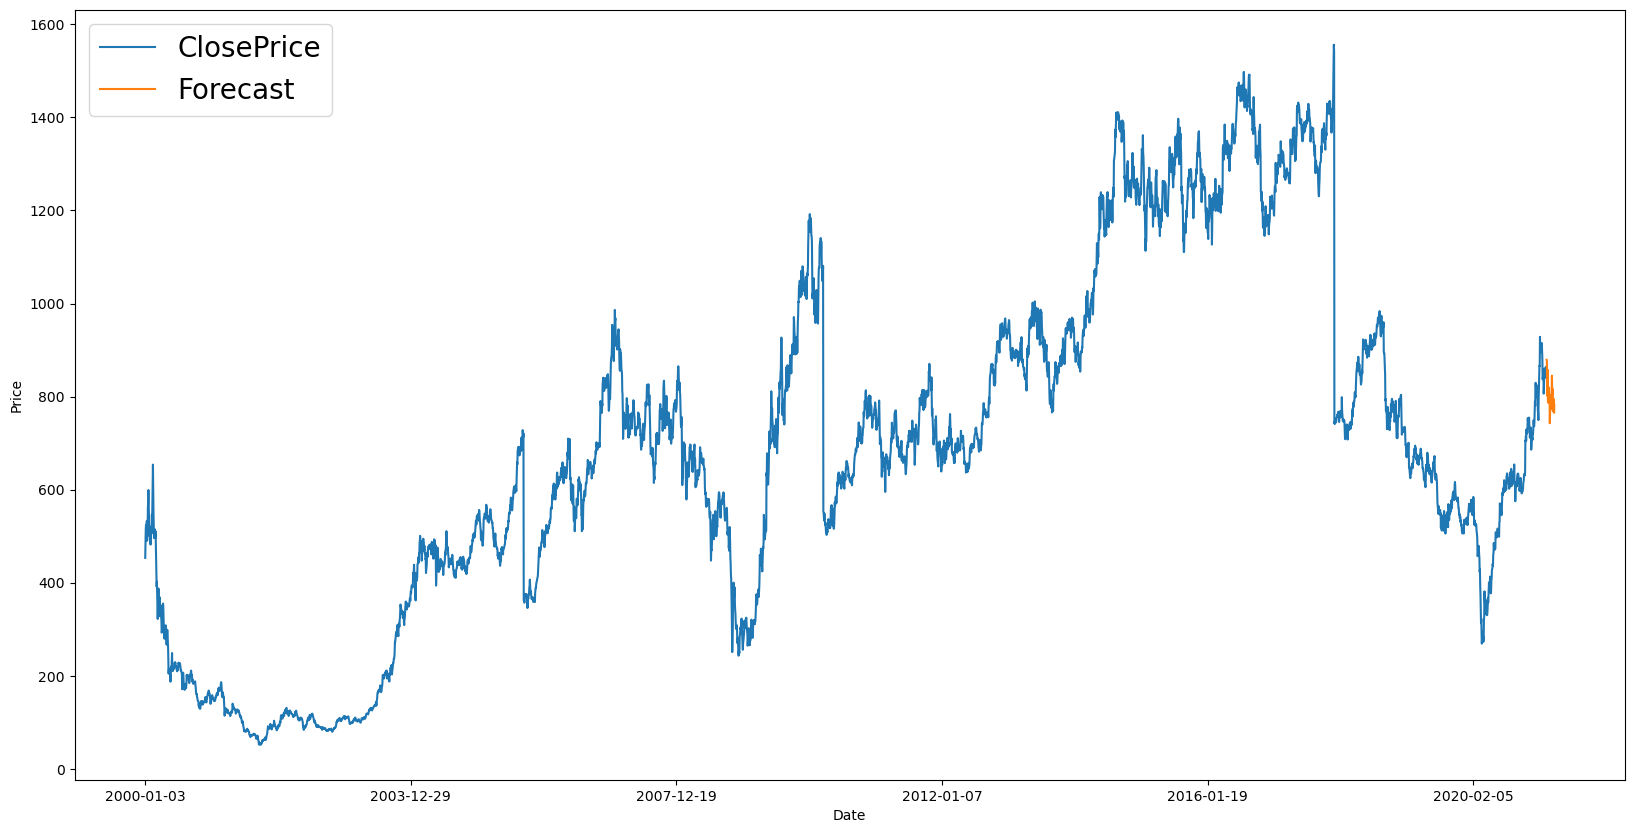

In [551]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')